
11490434/11490434 [==============================] - 4s 0us/step
(60000, 28, 28)
(60000, 10)
Model-1 Running.........





Epoch 1/10


300/300 - 3s - loss: 0.2916 - accuracy: 0.9193 - val_loss: 0.1096 - val_accuracy: 0.9686 - 3s/epoch - 10ms/step
Epoch 2/10
300/300 - 2s - loss: 0.0830 - accuracy: 0.9761 - val_loss: 0.0693 - val_accuracy: 0.9779 - 2s/epoch - 8ms/step
Epoch 3/10
300/300 - 2s - loss: 0.0569 - accuracy: 0.9833 - val_loss: 0.0469 - val_accuracy: 0.9843 - 2s/epoch - 8ms/step
Epoch 4/10
300/300 - 2s - loss: 0.0438 - accuracy: 0.9872 - val_loss: 0.0438 - val_accuracy: 0.9856 - 2s/epoch - 8ms/step
Epoch 5/10
300/300 - 2s - loss: 0.0357 - accuracy: 0.9897 - val_loss: 0.0440 - val_accuracy: 0.9861 - 2s/epoch - 8ms/step
Epoch 6/10
300/300 - 3s - loss: 0.0288 - accuracy: 0.9913 - val_loss: 0.0408 - val_accuracy: 0.9860 - 3s/epoch - 9ms/step
Epoch 7/10
300/300 - 2s - loss: 0.0250 - accuracy: 0.9927 - val_loss: 0.0404 - val_accuracy: 0.9874 - 2s/epoch - 8ms/step
Epoch 8/10
300/300 

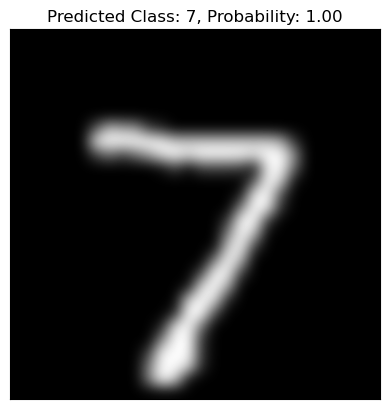

In [10]:
import pandas
import numpy
import keras

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.datasets import mnist
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)

# plt.imshow(x_train[0])

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
x_train /= 255
x_test /= 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape)

classes = y_train.shape[1]

print("Model-1 Running.........\n\n")

model = Sequential()
model.add(Conv2D(16, (5, 5), strides=(1, 1), activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation="relu"))
model.add(Dense(classes, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)

score = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: {}\nError: {}".format(score[1], 100 - score[1] * 100))

print("\n\nIncresing the Accuracy of the Model\n\n")

model = Sequential()
model.add(Conv2D(16, (5, 5), strides=(1, 1), activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(8, (2, 2), strides=(1, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation="relu"))
model.add(Dense(classes, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)

score = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: {}\nError: {}".format(score[1], 100 - score[1] * 100))


def predict_image(model, image):
    prediction = model.predict(image)
    predicted_class = prediction.argmax()
    probability = prediction[0, predicted_class]

    plt.imshow(image.reshape(28, 28), cmap="gray", interpolation="bicubic")
    plt.xticks([])
    plt.yticks([])
    plt.title(f"Predicted Class: {predicted_class}, Probability: {probability:.2f}")
    plt.show()


# Example usage of the prediction function
example_image = x_test[0].reshape(1, 28, 28, 1)
predict_image(model, example_image)